In [1]:
from __future__ import print_function, division
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import data as dt
import copy
import os
from pytorch_ssim import ssim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# print gpu
torch.cuda.set_device(2)
currentDevice = torch.cuda.current_device()
print("Current GPU: " + str(currentDevice))
print(str(torch.cuda.device_count()))
print(str(torch.cuda.get_device_capability(currentDevice)))
print(torch.__version__)

Current GPU: 2
8
(6, 1)
1.0.0


In [3]:
USE_GPU = 1
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:2')
else:
    device = "cpu"
print(device)

cuda:2


In [ ]:
# generate csv file, run only for the first time
# dt.generate_csv()

In [4]:
csvFilePath = dt.get_csv_path()
transformed_dataset = dt.HE_SHG_Dataset(csv_file=csvFilePath,
                                               transform=dt.Compose([                                              
                                               dt.Rescale(96),
                                               dt.Normalize(),
                                               dt.ToTensor() 
                                           ]))
# TODO: change the normalization parameters

In [5]:
# batchsize 32->16
dataloader = DataLoader(transformed_dataset, batch_size=32,
                        shuffle=True, num_workers=0)

In [16]:
def show_one_batch(dataloader):
    for i_batch, sample_batched in enumerate(dataloader):
        print(i_batch, sample_batched['input'].size(), 
              sample_batched['output'].size())

        # observe 4th batch and stop.
        if i_batch == 0:
            plt.figure()
            input_batch, label_batch = sample_batched['input'], sample_batched['output']
            batch_size = len(input_batch)
            im_size = input_batch.size(2)
            label_batch=label_batch.reshape([batch_size,1,im_size,im_size])
            print(label_batch.size())
#             input_batch = unnormalize_img(input_batch, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
#             label_batch = unnormalize_img(label_batch, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5])

            grid = utils.make_grid(input_batch)
            plt.imshow(grid.numpy().transpose((1, 2, 0)))
            plt.figure()

            grid = utils.make_grid(label_batch)
            plt.imshow(grid.numpy().transpose((1, 2, 0)))
        
            plt.axis('off')
            plt.ioff()
            plt.show()
            break
    return sample_batched

0 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


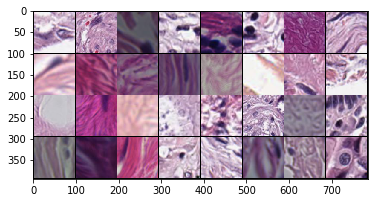

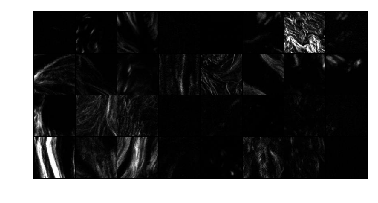

In [51]:
sample = show_one_batch(dataloader)

In [52]:
# CNN
import model_1 as mcnn
modelcnn = mcnn.Net()
cwd = os.getcwd();
path = os.path.join(cwd, 'Saved model', 'cnnshuffle.pth')
modelcnn.load_state_dict(torch.load(path))
modelcnn.eval()

Net(
  (block0): Sequential(
    (0): ReLU()
    (1): Conv2d(3, 128, kernel_size=(11, 11), stride=(1, 1), padding=(5, 5))
    (2): LeakyReLU(negative_slope=0.1)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): LeakyReLU(negative_slope=0.1)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (8): LeakyReLU(negative_slope=0.1)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(128, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (11): LeakyReLU(negative_slope=0.1)
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Conv2d(64, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): LeakyReLU(negative_slope=0.1)
    (15): Batch

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


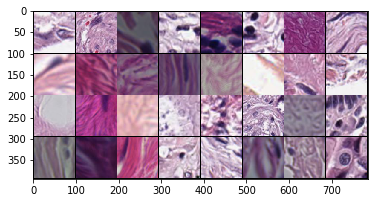

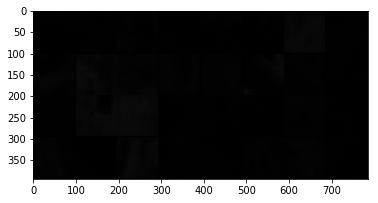

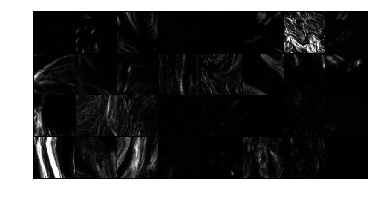

In [53]:
test(modelcnn, sample)

In [55]:
torch.cuda.empty_cache()

In [58]:
# DenseCNN
import model_3 as mdcnn
modeldcnn = mdcnn.Net()
cwd = os.getcwd();
path = os.path.join(cwd, 'Saved model', 'densecnnshuffle.pth')
modeldcnn.load_state_dict(torch.load(path))
modeldcnn.eval()

Net(
  (block0): Sequential(
    (0): ReLU()
    (1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (2): LeakyReLU(negative_slope=0.1)
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block1): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.1)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.1)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block3): Sequential(
    (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.1)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (side0_3): Sequential(
    (0): Conv2d(64, 32, kernel_

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


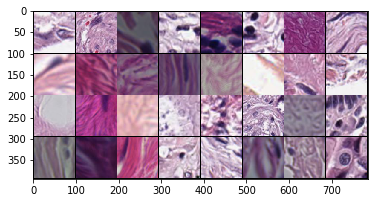

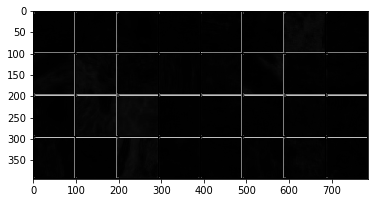

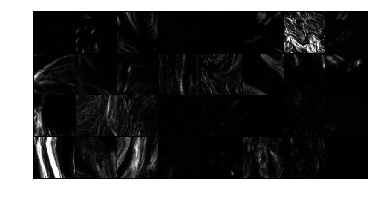

In [59]:
test(modeldcnn, sample)

In [62]:
torch.cuda.empty_cache()
# EncoderRes
import model as mer
modeler = mer.Net()
cwd = os.getcwd();
path = os.path.join(cwd, 'Saved model', 'encoderres.pth')
modeler.load_state_dict(torch.load(path))
modeler.eval()

Net(
  (block0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (block1): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.1)
  )
  (block2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


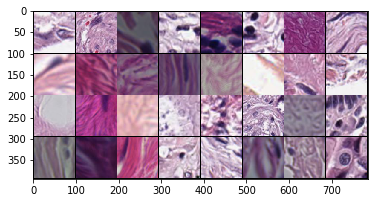

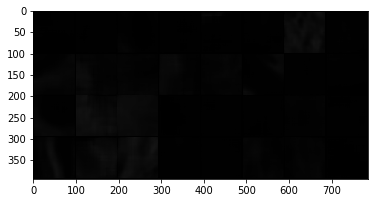

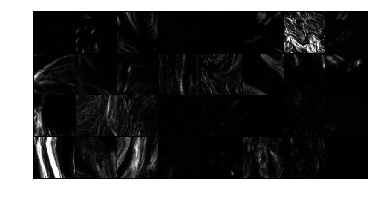

In [63]:
test(modeler, sample)

In [65]:
torch.cuda.empty_cache()
# EncoderRes
import model_4_o as meri
modeleri = meri.Net()
cwd = os.getcwd();
path = os.path.join(cwd, 'Saved model', 'encoderresinfo.pth')
modeleri.load_state_dict(torch.load(path))
modeleri.eval()

Net(
  (block0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (block1): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.1)
  )
  (info1): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
  )
  (block2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


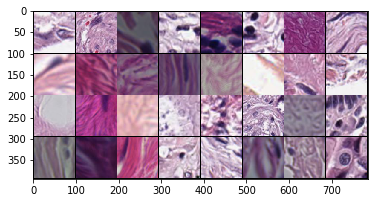

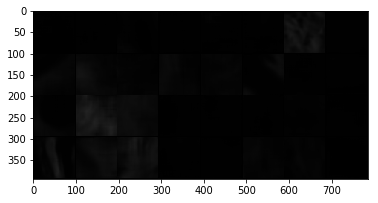

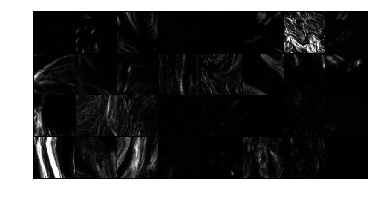

In [66]:
test(modeleri, sample)

In [22]:
import matplotlib.pyplot as plt
from torchvision import transforms, utils
def test(model, batch):
    with torch.no_grad():
        input, target = batch['input'].to(device), batch['output'].to(device)
            
        model.to(device)
        prediction = model(input)

        target = target.float()

        outdataloader = {'input':prediction,'output':target}
            
        print(outdataloader['input'].size(), 
                    outdataloader['output'].size())

        plt.figure()
        input_batch, label_batch = outdataloader['input'], outdataloader['output']
        batch_size = 32
        im_size = input_batch.size(2)
        label_batch=label_batch.reshape([batch_size,1,im_size,im_size])
        print(label_batch.size())
        grid = utils.make_grid(input).cpu()
        plt.imshow(grid.numpy().transpose((1, 2, 0)))
        plt.figure()
            
        grid = utils.make_grid(input_batch).cpu()
        plt.imshow(grid.numpy().transpose((1, 2, 0)))
        plt.figure()

        grid = utils.make_grid(label_batch).cpu()
        plt.imshow(grid.numpy().transpose((1, 2, 0)))

        plt.axis('off')
        plt.ioff()
        plt.show()

In [ ]:
test()